In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns

In [2]:
patches = pd.read_csv('../data/dataset/predictions.csv', index_col=0)
trees = pd.read_csv('../data/reforestree/field_data.csv')

In [3]:
patches = patches.rename(columns={"patch size": "patch_size"})
patches = patches.drop(columns=patches.columns[0], axis=1)

In [4]:
patches

,carbon,path,site,rotation,patch_size,site_index,predictions,true_value
0,2.624439,patches/Nestor Macias RGB_0_903.png,Nestor Macias RGB,0,224,"(13, 32)",1.562749,2.624439
1,2.127294,patches/Nestor Macias RGB_0_904.png,Nestor Macias RGB,0,224,"(13, 33)",3.706292,2.127294
2,1.362757,patches/Nestor Macias RGB_0_905.png,Nestor Macias RGB,0,224,"(13, 34)",2.681507,1.362757
3,2.979987,patches/Nestor Macias RGB_0_968.png,Nestor Macias RGB,0,224,"(14, 30)",0.733970,2.979987
4,3.440249,patches/Nestor Macias RGB_0_969.png,Nestor Macias RGB,0,224,"(14, 31)",2.677002,3.440249
...,...,...,...,...,...,...,...,...
5670,0.525466,patches/Manuel Macias RGB_0_2212.png,Manuel Macias RGB,0,224,"(35, 42)",0.000000,0.525466
5671,0.271437,patches/Manuel Macias RGB_0_2213.png,Manuel Macias RGB,0,224,"(35, 43)",0.000000,0.271437
5672,0.340547,patches/Manuel Macias RGB_0_2214.png,Manuel Macias RGB,0,224,"(35, 44)",0.000000,0.340547
5673,0.561319,patches/Manuel Macias RGB_0_2215.png,Manuel Macias RGB,0,224,"(35, 45)",0.000000,0.561319


In [5]:
a = [np.flip(eval(site_index))*patch_size for site_index, patch_size in zip(patches.site_index, patches.patch_size)]
b = [np.array([a[0], a[1] + patch_size]) for a, patch_size in zip(a, patches.patch_size)]
c = [np.array([a[0] + patch_size, a[1] + patch_size]) for a, patch_size in zip(a, patches.patch_size)]
d = [np.array([a[0] + patch_size, a[1]]) for a, patch_size in zip(a, patches.patch_size)]
vertices = np.moveaxis(np.stack((a,b,c,d)), 0, 1).tolist()
patches["vertices"] = vertices

In [6]:
image_shapes = {"Flora Pluas RGB": (15578, 16782),
                "Nestor Macias RGB": (13024, 15003),
                "Manuel Macias RGB": (10879, 13748),
                "Leonor Aspiazu RGB": (13855, 17134),
                "Carlos Vera Arteaga RGB": (15053, 15297),
                "Carlos Vera Guevara RGB": (12305, 12425)}

In [7]:
vertices_transformed_array = []
for idx, patch in patches.iterrows():
    angle = np.deg2rad(patch.rotation)
    A = np.array([[np.cos(angle), - np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    h = image_shapes[patch.site][0]
    w = image_shapes[patch.site][1]
    offset1 = np.array([w, h])
    w2 = int(np.dot(offset1, np.array([np.cos(angle), np.sin(angle)])))
    h2 = int(np.dot(offset1, np.array([np.sin(angle), np.cos(angle)])))
    offset2 = np.array([w2, h2])
    vertices_transformed = [np.dot(A, coordinate - 0.5 * offset1) + 0.5 * offset1 for coordinate in patch.vertices]
    vertices_transformed_array.append(np.rint(vertices_transformed).astype(int))

patches["vertices_transformed"] = vertices_transformed_array

In [8]:
site = "Leonor Aspiazu RGB"
patches_site = patches[patches.site == site]
trees_site = trees[trees.site == site]

In [9]:
patches_site

,carbon,path,site,rotation,patch_size,site_index,predictions,true_value,vertices,vertices_transformed
887,0.112245,patches/Leonor Aspiazu RGB_0_1041.png,Leonor Aspiazu RGB,0,224,"(13, 40)",0.502382,0.112245,"[[8960, 2912], [8960, 3136], [9184, 3136], [91...","[[8960, 2912], [8960, 3136], [9184, 3136], [91..."
888,0.125647,patches/Leonor Aspiazu RGB_0_1042.png,Leonor Aspiazu RGB,0,224,"(13, 41)",0.000000,0.125647,"[[9184, 2912], [9184, 3136], [9408, 3136], [94...","[[9184, 2912], [9184, 3136], [9408, 3136], [94..."
889,0.171805,patches/Leonor Aspiazu RGB_0_1043.png,Leonor Aspiazu RGB,0,224,"(13, 42)",0.000000,0.171805,"[[9408, 2912], [9408, 3136], [9632, 3136], [96...","[[9408, 2912], [9408, 3136], [9632, 3136], [96..."
890,0.063143,patches/Leonor Aspiazu RGB_0_1116.png,Leonor Aspiazu RGB,0,224,"(14, 38)",1.298049,0.063143,"[[8512, 3136], [8512, 3360], [8736, 3360], [87...","[[8512, 3136], [8512, 3360], [8736, 3360], [87..."
891,0.109803,patches/Leonor Aspiazu RGB_0_1117.png,Leonor Aspiazu RGB,0,224,"(14, 39)",1.445455,0.109803,"[[8736, 3136], [8736, 3360], [8960, 3360], [89...","[[8736, 3136], [8736, 3360], [8960, 3360], [89..."
...,...,...,...,...,...,...,...,...,...,...
2023,0.550060,patches/Leonor Aspiazu RGB_0_3882.png,Leonor Aspiazu RGB,0,224,"(50, 32)",3.077028,0.550060,"[[7168, 11200], [7168, 11424], [7392, 11424], ...","[[7168, 11200], [7168, 11424], [7392, 11424], ..."
2024,0.371856,patches/Leonor Aspiazu RGB_0_3883.png,Leonor Aspiazu RGB,0,224,"(50, 33)",3.682408,0.371856,"[[7392, 11200], [7392, 11424], [7616, 11424], ...","[[7392, 11200], [7392, 11424], [7616, 11424], ..."
2025,0.184254,patches/Leonor Aspiazu RGB_0_3884.png,Leonor Aspiazu RGB,0,224,"(50, 34)",3.475616,0.184254,"[[7616, 11200], [7616, 11424], [7840, 11424], ...","[[7616, 11200], [7616, 11424], [7840, 11424], ..."
2026,0.090363,patches/Leonor Aspiazu RGB_0_3885.png,Leonor Aspiazu RGB,0,224,"(50, 35)",5.040299,0.090363,"[[7840, 11200], [7840, 11424], [8064, 11424], ...","[[7840, 11200], [7840, 11424], [8064, 11424], ..."


In [10]:
carbon_distribution = np.load('../data/dataset/sites/{}_carbon.npy'.format(site))

image = cv2.imread('../data/dataset/sites/{}_image.png'.format(site))
image = np.array(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

image_original = cv2.imread('../data/reforestree/wwf_ecuador/RGB Orthomosaics/{}.tif'.format(site))
image_original = np.array(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))

In [11]:
carbon_threshold = 50

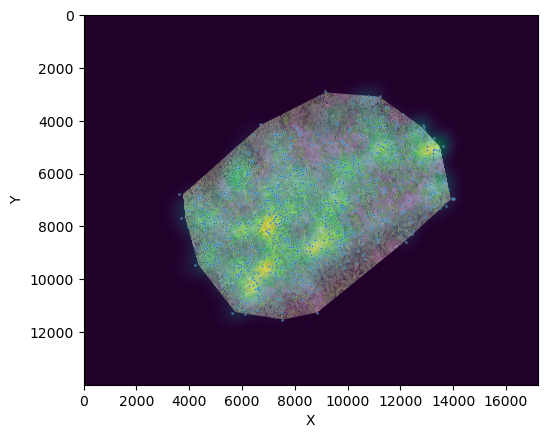

Carbon sum - all trees:  3198.4475447677346
Carbon sum - filtered trees:  2398.7679881120316
Carbon sum - gaussian distribution:  2398.739752179186


In [23]:
ax = plt.gca()
plt.imshow(image)
plt.imshow(carbon_distribution, alpha=0.5)
sns.scatterplot(data=trees_site, x="X", y="Y", legend=False, s=2)
plt.show()
print("Carbon sum - all trees: ", np.sum(trees_site.carbon))
print("Carbon sum - filtered trees: ", np.sum(trees_site[trees_site.carbon < carbon_threshold].carbon))
print("Carbon sum - gaussian distribution: ", np.sum(carbon_distribution))

In [24]:
print("Carbon sum - patches: ", patches_site.groupby(by="rotation").sum(numeric_only=True).carbon)

Carbon sum - patches:  rotation
0    2249.121305
Name: carbon, dtype: float64


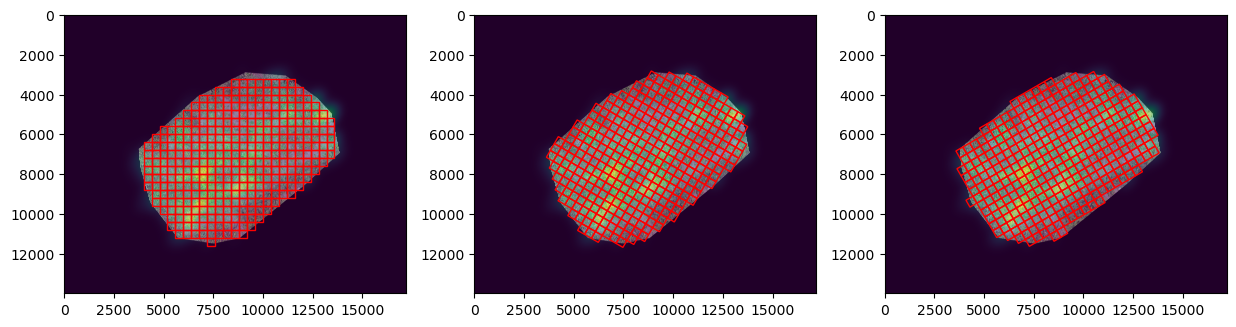

In [14]:
# works but only for transformed rectangles > 0
from scipy.ndimage import rotate
import imutils
import cv2

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs = axs.flat
for idx, angle_deg in enumerate(patches_site.rotation.unique()):
    axs[idx].imshow(image)
    axs[idx].imshow(carbon_distribution, alpha=0.5)
    for idx_patch, patch in patches_site[patches_site.rotation == angle_deg].iterrows():
        vertices = np.array(patch.vertices_transformed)
        patch_rec = plt.Rectangle(vertices[0], np.linalg.norm(vertices[1] - vertices[0]), np.linalg.norm(vertices[3] - vertices[0]), angle=patch.rotation, linewidth=1, edgecolor='r', facecolor='none')
        axs[idx].add_patch(patch_rec)
plt.show()

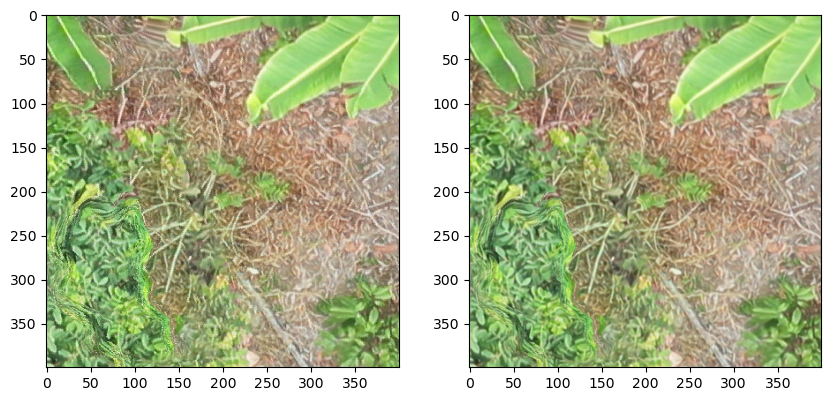

In [15]:
# comparing patches
patch = patches_site[patches_site.rotation == 60].iloc[20]
image_patch = cv2.imread('../data/dataset/{}'.format(patch.path))
image_patch = np.array(cv2.cvtColor(image_patch, cv2.COLOR_BGR2RGB))

rotated_image = imutils.rotate(image, patch.rotation)

fig, axs = plt.subplots(1, 2, figsize=(10,15))
axs = axs.flat

axs[0].imshow(image_patch)
axs[1].imshow(rotated_image[patch.vertices[0][1]:patch.vertices[2][1], patch.vertices[0][0]:patch.vertices[2][0]])
plt.show()

# Analysis of predictions

In [12]:
from sklearn.metrics import mean_squared_error
print("{:25s} | {:10s} | {:10s} | {:10s} | {:10s} | {:10s} | {:10s} | {:10s}".format("Site", "all trees", "filtered", "gaussian", "patches", "prediction", "c02/patch", "rmse"))
for site in patches.site.unique():
    trees_site = trees[trees.site == site]
    patches_site = patches[patches.site == site]
    carbon_distribution = np.load('../data/dataset/sites/{}_carbon.npy'.format(site))
    patch_carbon = np.mean(patches_site.carbon)
    rmse = mean_squared_error(patches_site.carbon, patches_site.predictions, squared=False)
    print("{:25s} | {:10.1f} | {:10.1f} | {:10.1f} | {:10.1f} | {:10.1f} | {:10.2f} | {:10.2f}".format(
        site, 
        np.sum(trees_site.carbon), 
        np.sum(trees_site[trees_site.carbon < carbon_threshold].carbon), 
        np.sum(carbon_distribution), 
        patches_site.groupby(by="rotation").sum(numeric_only=True).carbon[0],  
        patches_site.groupby(by="rotation").sum(numeric_only=True).predictions[0],
        patch_carbon,
        rmse
        ))

Site                      | all trees  | filtered   | gaussian   | patches    | prediction | c02/patch  | rmse      
Nestor Macias RGB         |     5792.7 |     3718.9 |     3718.9 |     3527.4 |     2264.1 |       3.98 |       2.54
Leonor Aspiazu RGB        |     3198.4 |     2398.8 |     2398.7 |     2249.1 |     2275.1 |       1.97 |       1.56
Carlos Vera Arteaga RGB   |     3034.6 |     2473.1 |     2473.0 |     2247.6 |     2757.6 |       2.05 |       1.64
Carlos Vera Guevara RGB   |     5830.6 |     4589.0 |     4588.9 |     4082.0 |      956.2 |       6.08 |       5.31
Flora Pluas RGB           |     4763.5 |     3929.1 |     3929.0 |     3640.5 |     4091.4 |       3.23 |       2.17
Manuel Macias RGB         |     1097.4 |     1097.4 |     1097.4 |     1012.5 |        0.0 |       1.34 |       1.61


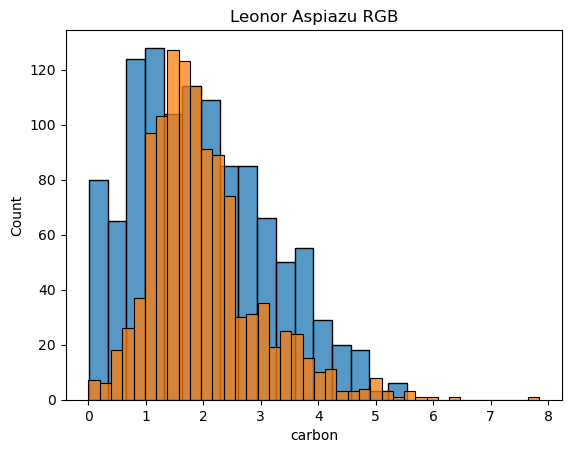

blue: true | orange: predictions


In [18]:
site = "Leonor Aspiazu RGB"
patches_site = patches[patches.site == site]
sns.histplot(data=patches_site, x="carbon")
sns.histplot(data=patches_site, x="predictions")
plt.title("Leonor Aspiazu RGB")
plt.show()
print("blue: true | orange: predictions")

In [19]:
image = cv2.imread('../data/dataset/sites/{}_image.png'.format(site))
image = np.array(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

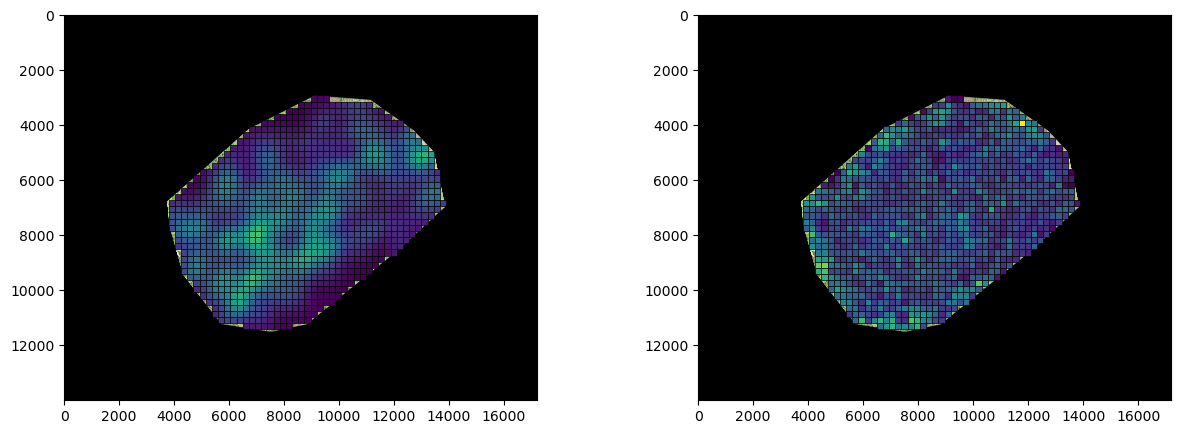

In [36]:
import matplotlib
fig, axs = plt.subplots(1, 2, figsize=(15,5))
cmap = matplotlib.cm.get_cmap('viridis')
max_carbon = max(np.max(patches_site.carbon), np.max(patches_site.predictions))
angle_deg = 0
axs = axs.flat
axs[0].imshow(image)
for idx_patch, patch in patches_site[patches_site.rotation == angle_deg].iterrows():
    vertices = np.array(patch.vertices_transformed)
    patch_rec = plt.Rectangle(vertices[0], np.linalg.norm(vertices[1] - vertices[0]), np.linalg.norm(vertices[3] - vertices[0]), angle=patch.rotation, linewidth=0.5, edgecolor='k', facecolor=cmap(patch.carbon/max_carbon), alpha=1)
    axs[0].add_patch(patch_rec)
axs[1].imshow(image)
for idx_patch, patch in patches_site[patches_site.rotation == angle_deg].iterrows():
    vertices = np.array(patch.vertices_transformed)
    patch_rec = plt.Rectangle(vertices[0], np.linalg.norm(vertices[1] - vertices[0]), np.linalg.norm(vertices[3] - vertices[0]), angle=patch.rotation, linewidth=0.5, edgecolor='k', facecolor=cmap(patch.predictions/max_carbon), alpha=1)
    axs[1].add_patch(patch_rec)
plt.show()